In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [2]:
from sklearn.cluster import KMeans
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values present in the data.

# Data Visualization
Let's look at how the variables are related to each other.

Text(0, 0.5, 'Spending Score (1-100)')

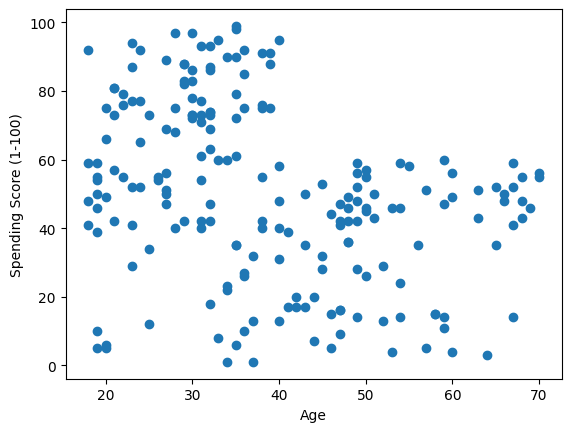

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Annual Income (k$)')

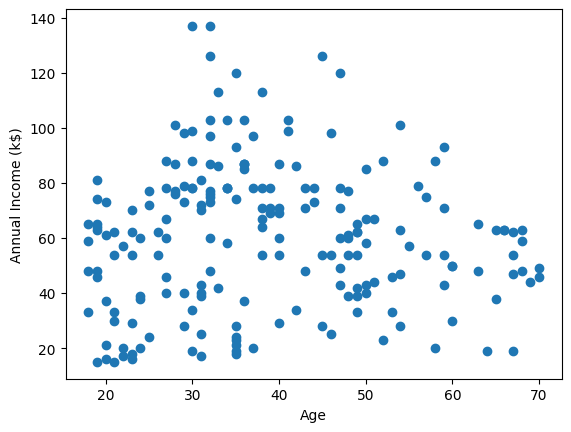

In [7]:
plt.scatter(df["Age"],df["Annual Income (k$)"])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

Text(0, 0.5, 'Annual Income (k$)')

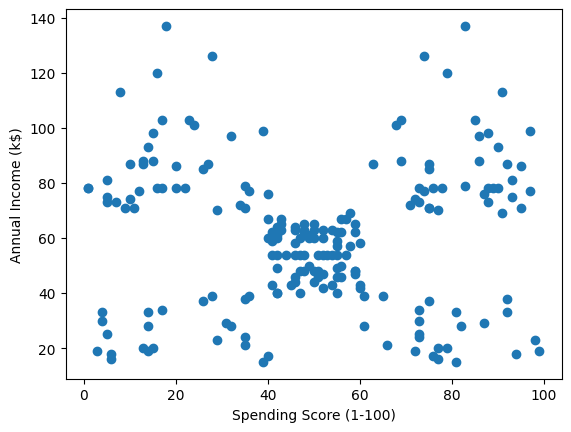

In [8]:
plt.scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"])
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

From these plots what we understood is that first plot shows 2 clusters whereas second plot is not giving any idea in the first look and the last one is showing 5 clusters..Since all the conclusions are not that useful to arrive at a conclusion we can move for k-means clustering here. Since there are no missing values we can directly go for selecting the attributes for the algorithm.

In [9]:
features = df.drop(['CustomerID','Genre'],axis=1)

# Transforming the data
Kmeans is sensitive to the measurement units and scales of the data. It is better to standardize the data first to tackle this issue. Also, this is a common practice prior to implementing any machine learning model.

Basically, the standardization substracts the mean of any feature from the actual values of that feature and divides the feature’s standard deviation.

The process is straightforward and is done as follows in Python:

In [10]:
'''Use the StandardScaler class from the sklearn.preprocessing module.
Apply the fit() method to compute the mean and standard deviation of the features.
Then finally use the transform() to scale the data.'''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(features)

scaled_data = scaler.transform(features)

# Best value for K
From different methods for finding the value of K.Here we are using elbow method,one of the widely used to find the optimal number of clusters. The first helper function creates for each value of K the corresponding KMeans model and saves its inertia along with the actual K value. The second function uses those inertias and K values to generate the final Elbow plot.

In [11]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [12]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

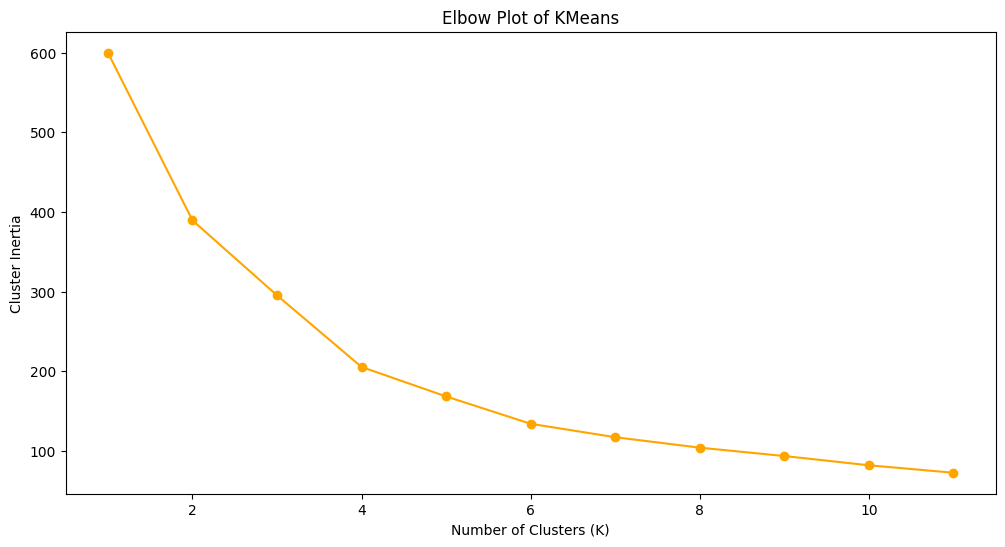

In [13]:
import warnings 
warnings.filterwarnings('ignore')
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

From the plot, we notice that the cluster inertia decreases as we increase the number of clusters. Also the drop the inertia is minimal after K=5 hence 5 can be considered as the optimal number of clusters.

# Create the final KMeans model
Once we have determined the optimal number of clusters, we can finally apply the KMeans model to that value as follows.

In [14]:
kmeans_model = KMeans(n_clusters = 5)

kmeans_model.fit(scaled_data)

KMeans(n_clusters=5)

We can access the cluster to which each data point belongs by using the .labels_ attribute. Let’s create a new column corresponding to those values.

In [15]:
features["clusters"] = kmeans_model.labels_

features.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2


By looking at the first 5 customers, we can observe that the first two and last two have been assigned to the first cluster (cluster 1), whereas the third customer belongs to the third cluster (cluster 3)

# Visualize the clusters
Now that we have generated the clusters, the final step is to visualize them.

Text(0, 0.5, 'Annual Income (k$)')

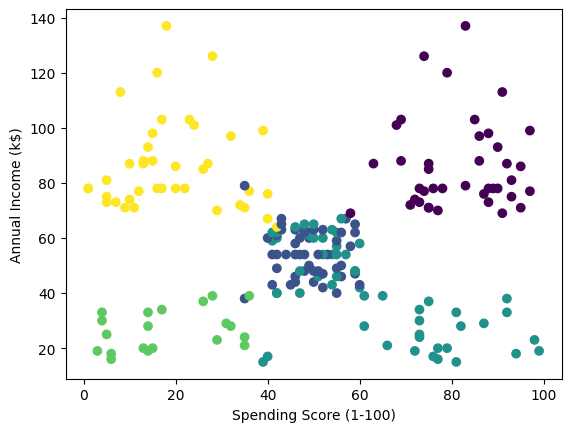

In [16]:
plt.scatter(features["Spending Score (1-100)"], 
            features["Annual Income (k$)"], 
            c = features["clusters"])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

The KMeans clustering seems to generate a pretty good result, and the five clusters are well separated from each other, even though there is a slight overlap between the purple and the yellow clusters.

The general observation is that :

* Customers on the top left have a low spending score and a high annual income. 
* A good marketing strategy could be implemented to target those customers so that they can spend more.
* On the other hand, customers on the bottom left have a low annual income and also spends less, which makes sense, because they are trying to adjust their spending habit to their budget.
* The top right customers are similar to the bottom left, the difference is that they have enough budget to spend.
Finally, the yellow group of customers spends beyond their budget.

Text(0, 0.5, 'Age')

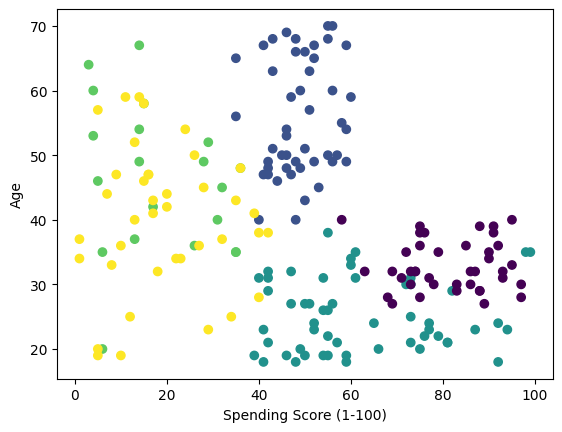

In [17]:
plt.scatter(features["Spending Score (1-100)"], 
            features["Age"], 
            c = features["clusters"])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')

This concludes the KMeans clustering for the dataset.